In [86]:
import pandas as pd
import matplotlib.pyplot as plt

veri = pd.read_excel("/content/EVDS (14) (1).xlsx")
print(veri)

       Tarih    TÜFE
0    2003-01   94.77
1    2003-02   96.23
2    2003-03   98.12
3    2003-04   99.09
4    2003-05  100.04
..       ...     ...
247  2023-08 1614.31
248  2023-09 1691.04
249  2023-10 1749.11
250  2023-11 1806.50
251  2023-12 1859.38

[252 rows x 2 columns]


In [87]:
veri.drop("Tarih",axis=1,inplace=True)
veri.set_index(pd.date_range("01-01-2003",periods=len(veri),freq="ME"),inplace=True)
print(veri)

              TÜFE
2003-01-31   94.77
2003-02-28   96.23
2003-03-31   98.12
2003-04-30   99.09
2003-05-31  100.04
...            ...
2023-08-31 1614.31
2023-09-30 1691.04
2023-10-31 1749.11
2023-11-30 1806.50
2023-12-31 1859.38

[252 rows x 1 columns]


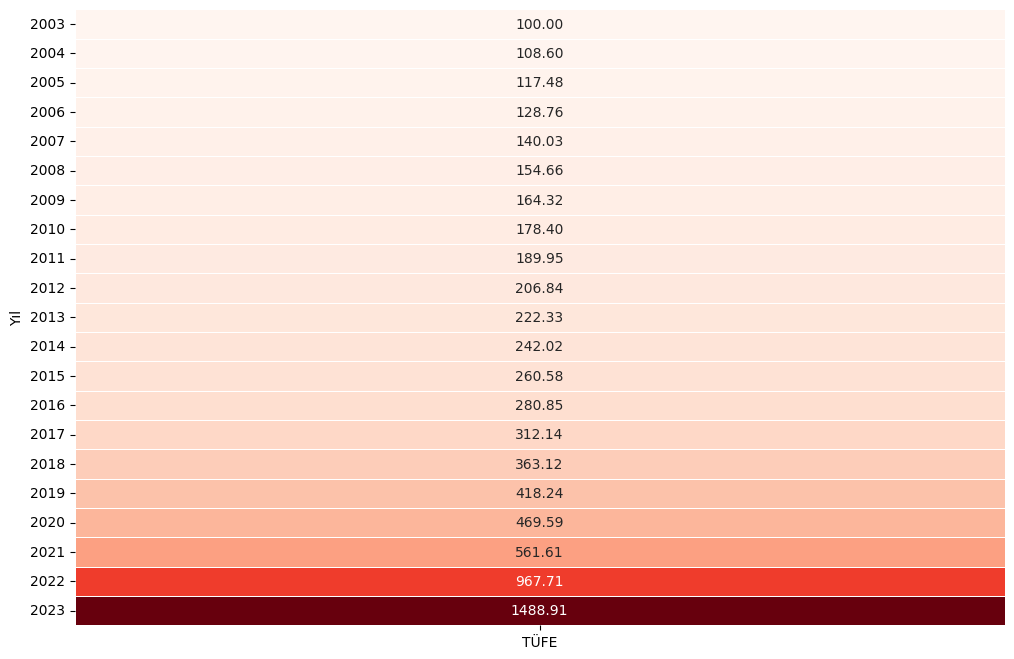

In [50]:
import seaborn as sns

veri["Yıl"]= veri.index.year
ort=veri.groupby("Yıl")["TÜFE"].mean().reset_index()

plt.figure(figsize=(12,8))
pivot_ort = ort.pivot_table(index="Yıl",values="TÜFE")
sns.heatmap(pivot_ort,annot=True,cmap="Reds",fmt=".2f",linewidths=0.5,cbar=False)
plt.show()

In [88]:
veri["Enflasyon Aylık"] =round(veri["TÜFE"].pct_change()*100,2)
veri["Enflasyon Yıllık"] =round(veri["TÜFE"].pct_change(12)*100,2)
veri.dropna(axis=0,inplace=True)
print(veri)

              TÜFE  Enflasyon Aylık  Enflasyon Yıllık
2004-01-31  104.81             0.66             10.59
2004-02-29  105.35             0.52              9.48
2004-03-31  106.36             0.96              8.40
2004-04-30  106.89             0.50              7.87
2004-05-31  107.35             0.43              7.31
...            ...              ...               ...
2023-08-31 1614.31             9.09             58.94
2023-09-30 1691.04             4.75             61.53
2023-10-31 1749.11             3.43             61.36
2023-11-30 1806.50             3.28             61.98
2023-12-31 1859.38             2.93             64.77

[240 rows x 3 columns]


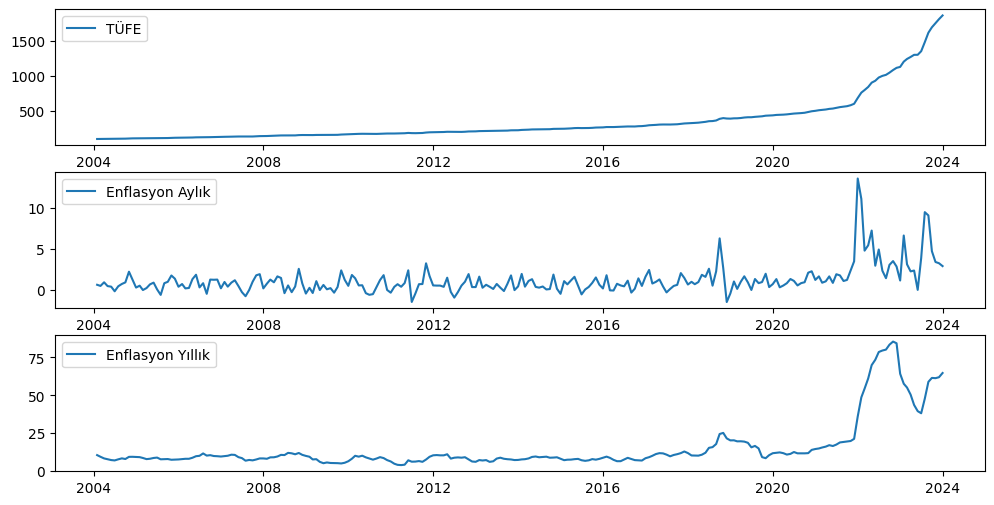

In [37]:
fig,axs = plt.subplots(3,1,figsize=(12,6))

axs[0].plot(veri["TÜFE"],label="TÜFE")
axs[0].legend()
axs[1].plot(veri["Enflasyon Aylık"],label="Enflasyon Aylık")
axs[1].legend()
axs[2].plot(veri["Enflasyon Yıllık"],label="Enflasyon Yıllık")
axs[2].legend()
plt.show()


In [38]:
print(veri[['Enflasyon Aylık',"Enflasyon Yıllık"]].describe())

       Enflasyon Aylık  Enflasyon Yıllık
count       240.000000        240.000000
mean          1.223125         15.378208
std           1.770823         16.888317
min          -1.440000          3.990000
25%           0.380000          7.857500
50%           0.840000          9.365000
75%           1.622500         11.937500
max          13.580000         85.510000


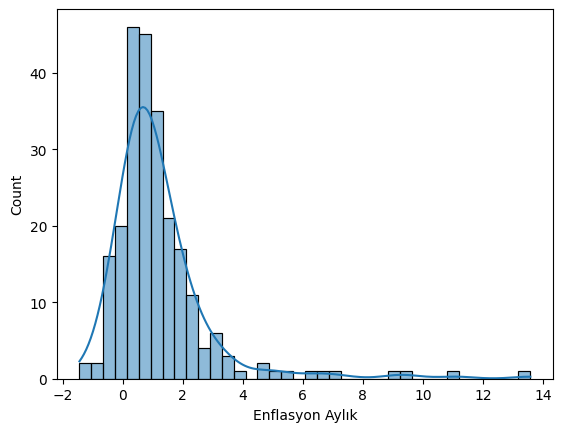

In [39]:
sns.histplot(veri["Enflasyon Aylık"],kde=True)
plt.show()

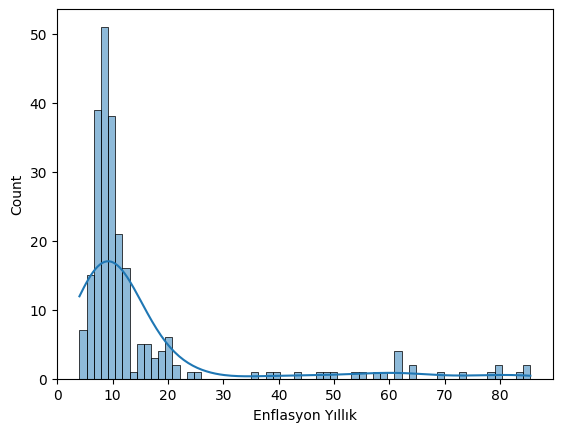

In [40]:
sns.histplot(veri["Enflasyon Yıllık"],kde=True)
plt.show()

In [41]:
print(veri.index.dtype)

datetime64[ns]


In [42]:
veri["Gün"] = veri.index.day
veri["Ay"] = veri.index.month
veri["Yıl"] = veri.index.year
veri["Haftanın Günü"] = veri.index.dayofweek
veri["Çeyrek"] = veri.index.quarter
veri["Yılın Günü"] = veri.index.dayofyear
print(veri)

               TÜFE   Yıl  Enflasyon Aylık  Enflasyon Yıllık  Gün  Ay  \
2004-01-31   104.81  2004             0.66             10.59   31   1   
2004-02-29   105.35  2004             0.52              9.48   29   2   
2004-03-31   106.36  2004             0.96              8.40   31   3   
2004-04-30   106.89  2004             0.50              7.87   30   4   
2004-05-31   107.35  2004             0.43              7.31   31   5   
...             ...   ...              ...               ...  ...  ..   
2023-08-31  1614.31  2023             9.09             58.94   31   8   
2023-09-30  1691.04  2023             4.75             61.53   30   9   
2023-10-31  1749.11  2023             3.43             61.36   31  10   
2023-11-30  1806.50  2023             3.28             61.98   30  11   
2023-12-31  1859.38  2023             2.93             64.77   31  12   

            Haftanın Günü  Çeyrek  Yılın Günü  
2004-01-31              5       1          31  
2004-02-29              6  

In [43]:
y= veri["TÜFE"]
x= veri.drop(columns={"TÜFE","Enflasyon Aylık","Enflasyon Yıllık"})
train_size = int(len(veri)*0.8)
x_train,x_test,y_train,y_test = x[:train_size],x[train_size:],y[:train_size],y[train_size:]
print(x_train,y_train)

             Yıl  Gün  Ay  Haftanın Günü  Çeyrek  Yılın Günü
2004-01-31  2004   31   1              5       1          31
2004-02-29  2004   29   2              6       1          60
2004-03-31  2004   31   3              2       1          91
2004-04-30  2004   30   4              4       2         121
2004-05-31  2004   31   5              0       2         152
...          ...  ...  ..            ...     ...         ...
2019-08-31  2019   31   8              5       3         243
2019-09-30  2019   30   9              0       3         273
2019-10-31  2019   31  10              3       4         304
2019-11-30  2019   30  11              5       4         334
2019-12-31  2019   31  12              1       4         365

[192 rows x 6 columns] 2004-01-31    104.81
2004-02-29    105.35
2004-03-31    106.36
2004-04-30    106.89
2004-05-31    107.35
               ...  
2019-08-31    422.84
2019-09-30    427.04
2019-10-31    435.59
2019-11-30    437.25
2019-12-31    440.50
Freq: ME, Nam

In [47]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,predictions=True)
models,predictions = reg.fit(x_train,x_test,y_train,y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 192, number of used features: 6
[LightGBM] [Info] Start training from score 218.019843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [65]:
df = pd.DataFrame(columns=["Lag","Model","Adj R2","RMSE"])

for i in range(1,11):
  veri[f"X_{i}"]=veri['TÜFE'].shift(i)
  veri.dropna(axis=0,inplace=True)
  y= veri["TÜFE"]
  x= veri.drop(columns={"TÜFE","Enflasyon Aylık","Enflasyon Yıllık"})
  train_size = int(len(veri)*0.8)

  train_size = int(len(veri)*0.8)
  x_train,x_test,y_train,y_test = x[:train_size],x[train_size:],y[:train_size],y[train_size:]
  reg = LazyRegressor(verbose=0)
  models,predictions = reg.fit(x_train,x_test,y_train,y_test)
  df=df._append({"Lag":i,"Model":models.index[0],"Adj R2":models.iloc[0][0],"RMSE":models.iloc[0][1]},ignore_index=True)

df=df.sort_values(by="RMSE")
print(df)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 191, number of used features: 1
[LightGBM] [Info] Start training from score 218.612565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 2
[LightGBM] [Info] Start training from score 219.805767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 3
[LightGBM] [Info] Start training from score 222.825080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 184, number of used features: 4
[LightGBM] [Info] Start training from score 226.513315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 180, number of used features: 5
[LightGBM] [Info] Start training from score 230.877000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 175, number of used features: 6
[LightGBM] [Info] Start training from score 236.066057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 169, number of used features: 7
[LightGBM] [Info] Start training from score 242.068106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 163, number of used features: 8
[LightGBM] [Info] Start training from score 250.283803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

  0%|          | 0/42 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [66]:
from sklearn.linear_model import RANSACRegressor
for i in range(1,5):
  veri[f"X_{i}"]=veri['TÜFE'].shift(i)
  veri.dropna(axis=0,inplace=True)

y= veri["TÜFE"]
x= veri.drop(columns={"TÜFE","Enflasyon Aylık","Enflasyon Yıllık"})
train_size = int(x.shape[0]*0.8)


x_train,x_test,y_train,y_test = x[:train_size],x[train_size:],y[:train_size],y[train_size:]

model = RANSACRegressor(random_state=0)
model.fit(x_train,y_train)
train_tahmin = model.predict(x_train)
test_tahmin = model.predict(x_test)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9993801961012934
0.9924821317474397


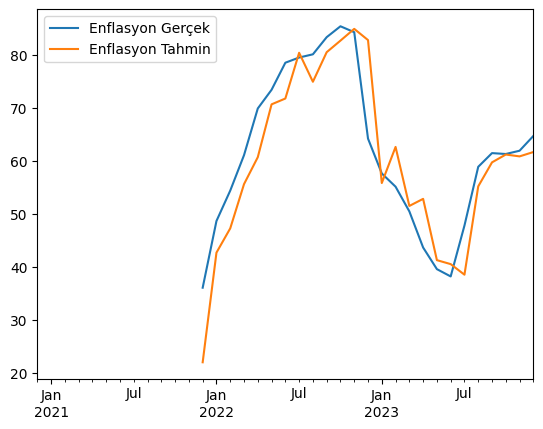

In [78]:
df2 = pd.DataFrame({"TÜFE":y_test,"Tahmin":test_tahmin})
df2["Enflasyon Gerçek"] = round(df2["TÜFE"].pct_change(12)*100,2)
df2["Enflasyon Tahmin"] = round(df2["Tahmin"].pct_change(12)*100,2)

df2.plot(y=["Enflasyon Gerçek","Enflasyon Tahmin"])
plt.show()

In [79]:
print(df2[["Enflasyon Gerçek","Enflasyon Tahmin"]])

            Enflasyon Gerçek  Enflasyon Tahmin
2020-12-31               NaN               NaN
2021-01-31               NaN               NaN
2021-02-28               NaN               NaN
2021-03-31               NaN               NaN
2021-04-30               NaN               NaN
2021-05-31               NaN               NaN
2021-06-30               NaN               NaN
2021-07-31               NaN               NaN
2021-08-31               NaN               NaN
2021-09-30               NaN               NaN
2021-10-31               NaN               NaN
2021-11-30               NaN               NaN
2021-12-31             36.08             21.98
2022-01-31             48.69             42.71
2022-02-28             54.44             47.30
2022-03-31             61.14             55.66
2022-04-30             69.97             60.76
2022-05-31             73.50             70.75
2022-06-30             78.62             71.85
2022-07-31             79.60             80.50
2022-08-31   

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0029 - val_loss: 0.1351
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0020 - val_loss: 0.1201
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0014 - val_loss: 0.1060
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.5097e-04 - val_loss: 0.0930
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.6416e-04 - val_loss: 0.0819
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.7040e-04 - val_loss: 0.0726
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.5116e-04 - val_loss: 0.0659
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.1894e-04 - val_loss: 0.0621
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4.0304e-04 - val_loss: 0.0605
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.6696e-04 - val_loss: 0.0594
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.3144e-04 - val_loss: 0.0586
Epoch 12/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 

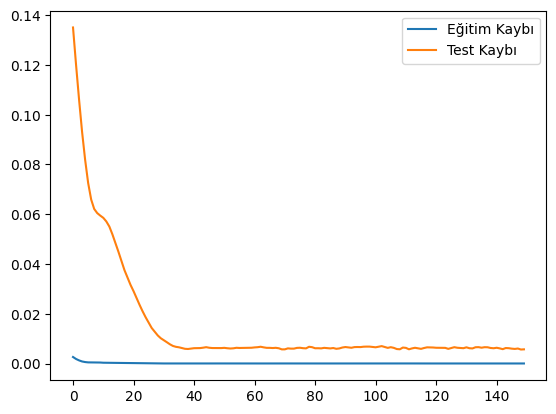

In [91]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.optimizers import Adam

sc = MinMaxScaler()
veri_sc = sc.fit_transform(veri[["TÜFE"]])

train_size = int(len(veri)*0.7)
train = veri_sc[:train_size]
test = veri_sc[train_size:]


def ts(data,timestep):
  x,y = [],[]
  for i in range(timestep,len(data)):
    x.append(data[i-timestep:i,0])
    y.append(data[i,0])
  return np.array(x),np.array(y)

x_train,y_train = ts(train,12)
x_test,y_test = ts(test,12)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


model = Sequential()
model.add(LSTM(128,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer=Adam(learning_rate=0.0001),loss="mse")
history = model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

plt.plot(history.history["loss"],label="Eğitim Kaybı")
plt.plot(history.history["val_loss"],label="Test Kaybı")
plt.legend()
plt.show()




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


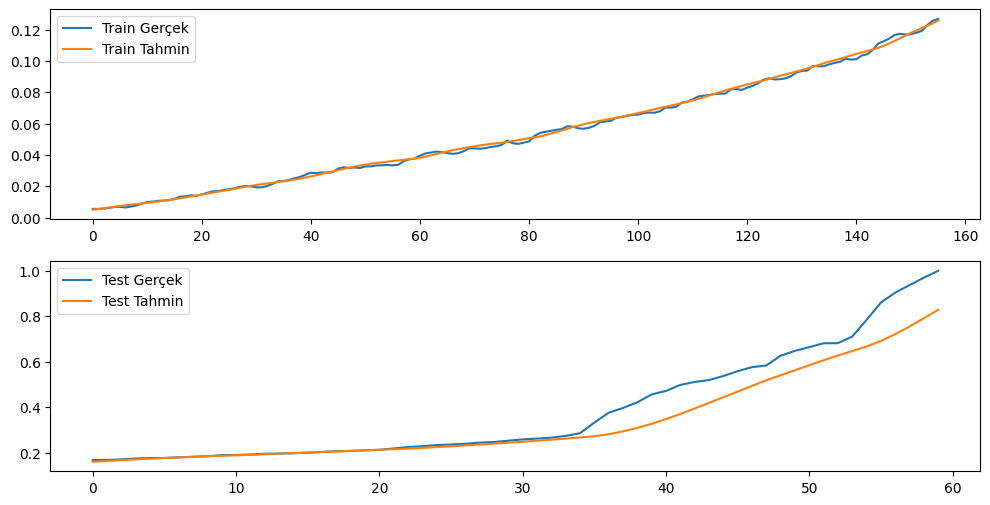

In [93]:
train_tahmin = model.predict(x_train)
test_tahmin = model.predict(x_test)

train_tahmin = sc.inverse_transform(train_tahmin)
test_tahmin = sc.inverse_transform(test_tahmin)
y_train = sc.inverse_transform(y_train)
y_test = sc.inverse_transform(y_test)

fig,axs = plt.subplots(2,1,figsize=(12,6))
axs[0].plot(y_train,label="Train Gerçek")
axs[0].plot(train_tahmin,label="Train Tahmin")
axs[0].legend()
axs[1].plot(y_test,label="Test Gerçek")
axs[1].plot(test_tahmin,label="Test Tahmin")
axs[1].legend()
plt.show()